In [2]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Problem 1

## Generating Data
If you followed the link to the study, you saw that there was not actually raw data. Below is how I generated it, for your awareness.

In [3]:
import numpy as np

In [4]:
fam = 0
friends = 0
qol = 0
career = 0
diff = 0
religion = 0
society = 0
health = 0
hobbies = 0

for ind in range(2596):
    r = np.random.rand()
    if r < 0.28655:
        fam += 1
    elif r < 0.403509:
        friends += 1
    elif r < 0.508772:
        qol += 1
    elif r < 0.608187:
        career += 1
    elif r < 0.707602:
        diff += 1
    elif r < 0.795322:
        religion += 1
    elif r < 0.877193:
        society += 1
    elif r < 0.94152:
        health += 1
    else:
        hobbies += 1


In [5]:
results = [fam, friends, qol, career, diff, religion, society, health, hobbies]

In [6]:
print(results)

[760, 317, 270, 250, 248, 230, 207, 173, 141]


## Part A

In [7]:
freq = [716, 300, 265, 262, 285, 250, 210, 172, 136]
rel_freq = np.divide(freq, sum(freq))
print(rel_freq)

[0.27580894 0.1155624  0.10208012 0.1009245  0.10978428 0.096302
 0.08089368 0.06625578 0.05238829]


## Part B

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', size=18)
sns.set_style('whitegrid')

In [9]:
# Create the DataFrame
topics = ['Family', 'Friends', 'Material Well-being', 'Career', 'Challenges', 'Spirituality', 'Society', 'Health', 'Hobbies']
df = pd.DataFrame({'Topic':topics, 'Frequency':freq, 'Relative Frequency':rel_freq})

In [10]:
# Sort on Frequency
df.sort_values('Frequency', ascending=False, inplace=True)

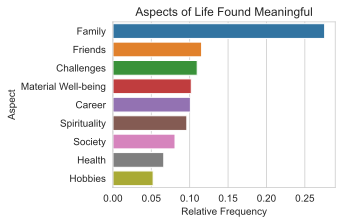

In [11]:
# Create the plot and save the figure.
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(data=df, x='Relative Frequency', y='Topic')
ax.set_title("Aspects of Life Found Meaningful")
ax.set_ylabel('Aspect')
plt.savefig('3b.svg')

# Problem 2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', size=18)
sns.set_style('whitegrid')

In [13]:
gamedata = pd.read_csv('bgg.csv')

In [14]:
gamedata.head()

,primary,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,...,Family Game Rank,stddev,median,owned,trading,wanting,wishing,numcomments,numweights,averageweight
0,Pandemic,2008,2,4,45,45,45,8,96241,7.61567,...,10.0,1.32632,0,144727,2191,640,8571,15778,5232,2.4148
1,Carcassonne,2000,2,5,45,30,45,7,96228,7.41884,...,34.0,1.30369,0,140066,1587,539,6286,17720,7304,1.9158
2,Catan,1995,3,4,120,60,120,10,96213,7.16265,...,108.0,1.47908,0,144656,1825,474,5310,17859,7187,2.3264
3,7 Wonders,2010,2,7,30,30,30,10,79873,7.76049,...,6.0,1.27618,0,106137,1393,1044,10875,13304,4423,2.3321
4,Dominion,2008,2,4,30,30,30,13,74959,7.62671,...,NaN,1.42504,0,97736,1897,637,7607,13008,4850,2.3586


## Part A

In [15]:
gamedata['averageweight'] > 0

0         True
1         True
2         True
3         True
4         True
         ...  
19225     True
19226     True
19227     True
19228    False
19229     True
Name: averageweight, Length: 19230, dtype: bool

In [16]:
# Remove any games with weight of 0.
gamedata = gamedata[gamedata['averageweight'] > 0]

In [17]:
gamedata['averageweight'].describe()

count    18821.000000
mean         2.037925
std          0.806351
min          1.000000
25%          1.341500
50%          2.000000
75%          2.571400
max          5.000000
Name: averageweight, dtype: float64

In [18]:
np.std(gamedata['averageweight'], ddof=1)

0.8063513915480747

In [19]:
np.var(gamedata['averageweight'], ddof=1)

0.6502025666515164

## Part B

In [20]:
gamedata['Family Game?'] = gamedata['Family Game Rank'].apply(np.isnan)
gamedata['Family Game?'] = gamedata['Family Game?'].map({False: 'Yes', True: 'No'})

In [21]:
arr = gamedata['Family Game Rank'].apply(np.isnan)
arr == False

0         True
1         True
2         True
3         True
4        False
         ...  
19224    False
19225    False
19226    False
19227    False
19229    False
Name: Family Game Rank, Length: 18821, dtype: bool

In [22]:
gamedata['Family Game?'].value_counts()

No     16820
Yes     2001
Name: Family Game?, dtype: int64

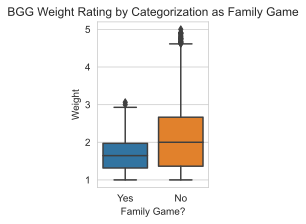

In [23]:
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(data=gamedata, x='Family Game?', y='averageweight')
ax.set_ylabel('Weight')
ax.set_title('BGG Weight Rating by Categorization as Family Game')
plt.savefig('4b.svg')

## Part C

In [24]:
fig, ax = plt.subplots(figsize=(5,3))
sns.scatterplot(data=gamedata, x='averageweight', y='average')
ax.set_xlabel('Weight')
ax.set_ylabel('Average Rating')
ax.set_title('Average BGG User Rating by Weight')
plt.savefig('4c.png')  # Using PNG rather than SVG for file size

# Problem 3

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', size=18)
sns.set_style('whitegrid')

## Part A

In [26]:
hof = pd.read_csv('hofbatting.csv')
hof.head()

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS
0,1,Hank Aaron HOF,1982,23,1954,1976,25,137.3,3298,13941,...,755,2297,240,73.0,1402,1383,0.305,0.374,0.555,0.928
1,3,Roberto Alomar HOF,2011,17,1988,2004,12,62.9,2379,10400,...,210,1134,474,114.0,1032,1140,0.300,0.371,0.443,0.814
2,6,Cap Anson HOF,1939,27,1871,1897,0,91.1,2524,11331,...,97,2075,277,16.0,984,330,0.334,0.394,0.447,0.841
3,7,Luis Aparicio HOF,1984,18,1956,1973,13,51.7,2599,11230,...,83,791,506,136.0,736,742,0.262,0.311,0.343,0.653
4,8,Luke Appling HOF,1964,20,1930,1950,7,69.9,2422,10254,...,45,1116,179,108.0,1302,528,0.310,0.399,0.398,0.798


In [27]:
# Create the mid-career year column
hof['Mid-Career'] = 0.5 * (hof['From'] + hof['To'])

In [28]:
# Define a function mapping mid-career year to era.
def label_era (year):
    if year <= 1900:
        return '19th Century'
    elif year <= 1919:
        return 'Dead Ball'
    elif year <= 1941:
        return 'Lively Ball'
    elif year <= 1960:
        return 'Integration'
    elif year <= 1976:
        return 'Expansion'
    elif year <= 1993:
        return 'Free Agency'
    else:
        return 'Long Ball'

In [29]:
# Create era column.
hof['Era'] = hof['Mid-Career'].apply(label_era)

In [30]:
# Dissecting value_counts() to make sure I have the right values.
print(hof['Era'].value_counts().index)
print(hof['Era'].value_counts().values)

Index(['Lively Ball', 'Integration', 'Expansion', 'Dead Ball', 'Free Agency',
       '19th Century', 'Long Ball'],
      dtype='object')
[46 24 21 19 18 17  2]


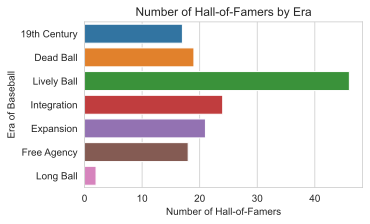

In [31]:
# Create Bar Plot
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(x=hof['Era'].value_counts().values, y=hof['Era'].value_counts().index, 
            order=('19th Century', 'Dead Ball', 'Lively Ball', 'Integration', 'Expansion', 'Free Agency', 'Long Ball'))
ax.set_xlabel('Number of Hall-of-Famers')
ax.set_ylabel('Era of Baseball')
ax.set_title('Number of Hall-of-Famers by Era')
plt.savefig('5aBar.svg')

I removed the requirement for a pie chart, but if you had wanted to, you could.

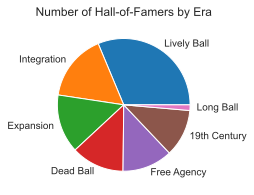

In [32]:
# Create Pie Chart
fig, ax = plt.subplots(figsize=(5,3))
hof['Era'].value_counts().plot(kind='pie')
ax.set_title('Number of Hall-of-Famers by Era')
ax.set_ylabel('')  # Otherwise Era shows up awkwardly on left.
plt.savefig('5aPie.svg')

## Part B

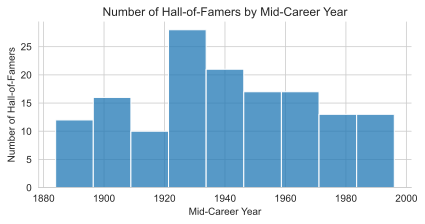

In [33]:
fg = sns.displot(data=hof, x='Mid-Career', aspect=2, height=3)
fg.ax.set_title('Number of Hall-of-Famers by Mid-Career Year')
fg.ax.set_xlabel('Mid-Career Year')
fg.ax.set_ylabel('Number of Hall-of-Famers')
plt.savefig('5b.svg')

## Part C

In [34]:
# Names all include 'HOF' at end. Let's remove those.
def strip_hof(name):
    return name[:-4]

hof['Name'] = hof['Unnamed: 1'].apply(strip_hof)

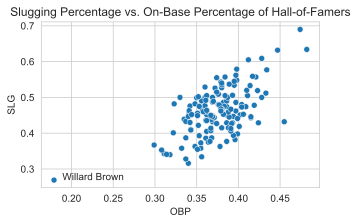

In [35]:
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.scatterplot(data=hof, x='OBP', y='SLG')
hof_outlier = hof.query('SLG < 0.3 & OBP < 0.2')
x = hof_outlier['OBP'].values[0]
y = hof_outlier['SLG'].values[0]
s = hof_outlier['Name'].values[0]
ax.text(x=x+0.01, y=y, s=s)
ax.set_title('Slugging Percentage vs. On-Base Percentage of Hall-of-Famers')

plt.savefig('5c.svg')

## Part D

In [36]:
import scipy.stats as stats

In [37]:
hof['zOPS'] = stats.zscore(hof['OPS'], ddof=1)

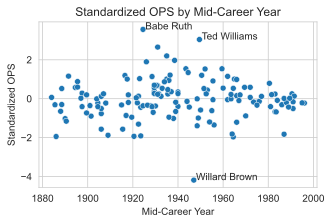

In [38]:
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.scatterplot(data=hof, x='Mid-Career', y='zOPS')
hof_outlier = hof[(hof['zOPS'] < -3) | (hof['zOPS'] > 3)]  # A different method
ax.set_title('Standardized OPS by Mid-Career Year')
ax.set_ylabel('Standardized OPS')
ax.set_xlabel('Mid-Career Year')

for ind in range(len(hof_outlier)):
    x = hof_outlier['Mid-Career'].iloc[ind]
    y = hof_outlier['zOPS'].iloc[ind]
    s = hof_outlier['Name'].iloc[ind]
    ax.text(x=x+1, y=y, s=s)

plt.savefig('5d.svg')

## Part E like it's 1999

In [39]:
hof['HRR'] = np.divide(hof['HR'], hof['AB'])

In [40]:
# Create a tuple of eras for ordering
order=('19th Century', 'Dead Ball', 'Lively Ball', 'Integration', 'Expansion', 'Free Agency', 'Long Ball')

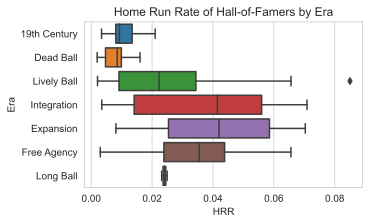

In [41]:
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.boxplot(data=hof, x='HRR', y='Era', order=order)
ax.set_title('Home Run Rate of Hall-of-Famers by Era')
plt.savefig('5e.svg')

If you prefer to have vertical boxes, you can rotate the axes as such:

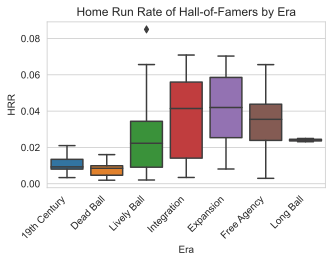

In [42]:
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.boxplot(data=hof, y='HRR', x='Era', order=order)
ax.set_title('Home Run Rate of Hall-of-Famers by Era')
# ax.set_xticklabels(['19C','DB','Lively','IE','EE','FA','Long'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [43]:
out = hof.groupby('Era').describe()['HRR']
out['Range'] = out['max'] - out['min']
out

,count,mean,std,min,25%,50%,75%,max,Range
Era,,,,,,,,,
19th Century,17.0,0.010869,0.004594,0.003396,0.008071,0.009278,0.013447,0.021007,0.017611
Dead Ball,19.0,0.007816,0.003800,0.001955,0.004688,0.008537,0.009906,0.016043,0.014087
Expansion,21.0,0.040960,0.018871,0.008113,0.025386,0.041999,0.058565,0.070333,0.062219
Free Agency,18.0,0.034199,0.015825,0.002980,0.023875,0.035472,0.043827,0.065613,0.062633
Integration,24.0,0.036149,0.022531,0.003467,0.014104,0.041454,0.055998,0.070893,0.067427
Lively Ball,46.0,0.024583,0.019393,0.002073,0.009117,0.022306,0.034400,0.085010,0.082937
Long Ball,2.0,0.024046,0.001273,0.023146,0.023596,0.024046,0.024496,0.024946,0.001801


In [44]:
out.to_clipboard()